<a href="https://colab.research.google.com/github/debangshu16/Eigenfaces-for-Recognition/blob/master/eigenfaces_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting Dataset

In [0]:
os.listdir('My Drive/LAA_project')

['yalefaces.zip', 'data']

In [0]:
data_path = 'My Drive/LAA_project'
if os.path.exists(os.path.join(data_path,'data','yalefaces')):
  print ('Data already extracted')
else:
  print ('Extracting Data')
  from zipfile import ZipFile
  zf = ZipFile(os.path.join(data_path,'yalefaces.zip'), 'r')
  zf.extractall(os.path.join(data_path,'data'))
  zf.close()

Data already extracted


In [0]:
img_path = os.path.join(data_path,'data','yalefaces')
img_path

'My Drive/LAA_project/data/yalefaces'

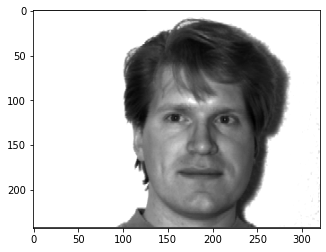

In [0]:
from skimage.io import imread
i = imread(os.path.join(img_path,'subject01.gif'))/255.0
plt.imshow(i,cmap=plt.cm.gray)

In [0]:
i.shape

(243, 320)

In [0]:
np.amin(i),np.amax(i)

(0.03529411764705882, 1.0)

In [0]:
test_images = []
for i in range(1,16):
  if i<10:
    people = 'subject0'+str(i)+'.normal'
  else:
    people = 'subject' + str(i) +'.normal'
  test_images.append(people)

print (test_images)

['subject01.normal', 'subject02.normal', 'subject03.normal', 'subject04.normal', 'subject05.normal', 'subject06.normal', 'subject07.normal', 'subject08.normal', 'subject09.normal', 'subject10.normal', 'subject11.normal', 'subject12.normal', 'subject13.normal', 'subject14.normal', 'subject15.normal']


**Computing Average Face**

In [0]:
images = list(os.listdir(img_path))
images.remove('Readme.txt')
len(images)

165

In [0]:
train_images = list(set(images) - set(test_images))
print (len(train_images))

150


In [0]:
images = train_images
images.sort()
print (images)

['subject01.gif', 'subject01.glasses', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy', 'subject04.surprised', 'subject04.wink', 'subject05.centerlight', 'subject05.glasses', 'subject05.happy', 'subject05.leftlight', 'subject05.noglasses', 'subject05.rightlight', 'subject05.sad', 'su

In [0]:
i1 = imread(os.path.join(img_path,images[0]))/255.0
print (i1.shape)
avg_img = np.zeros(i1.shape)
avg_img = avg_img + i1

for file in images[1:]:

    img = imread(os.path.join(img_path,file))/255.0

    avg_img = avg_img + img

n = len(images)
avg_img = avg_img / n
print (np.amin(avg_img),np.amax(avg_img))

(243, 320)
0.13918954248366 1.0


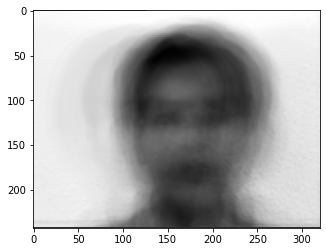

In [0]:
plt.imshow(avg_img,cmap='gray')

In [0]:
np.amin(avg_img),np.amax(avg_img)

(0.13918954248366, 1.0)

**Calculating deviation of each image from average image**

In [0]:
dev = []
for img in images:
    image = imread(os.path.join(img_path,img))/255.0
    d = image - avg_img

    dev.append(d)

dev = np.array(dev)
print (dev.shape)

(150, 243, 320)


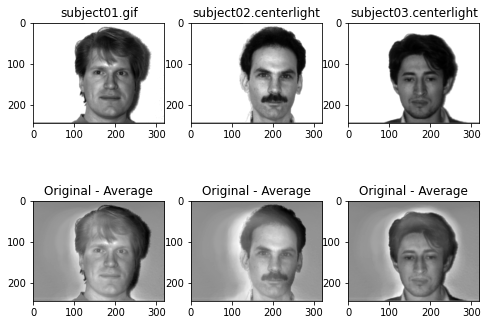

In [0]:

fig,axs = plt.subplots(2,3,figsize = (8,6))
for i in range(3):
  axs[0,i].imshow(imread(os.path.join(img_path,images[10*i]))/255.0,cmap = plt.cm.gray)
  axs[0,i].set_title(images[10*i])
  axs[1,i].imshow(dev[10*i,:,:],cmap=plt.cm.gray)
  axs[1,i].set_title('Original - Average')
plt.show()


**Flattening the arrays and computing eigen faces**

In [0]:
f = []
for img in dev:
    flattened = img.flatten()

    f.append(flattened)

f = np.array(f)
print (f.shape)


(150, 77760)


In [0]:
C = f @ f.T
print (C.shape)

(150, 150)


In [0]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
index_evalues = [(i,x) for i,x in enumerate(eigenvalues)]
index_evalues.sort(key = lambda x: x[1], reverse = True)

In [0]:
eigenfaces = []
for l in range(eigenvectors.shape[0]):
  vl = eigenvectors[l]
  ul = np.zeros(shape = f.shape[1])
  for k in range(f.shape[0]):
    vlk = vl[k]
    ul = ul + vlk * f[k]
  eigenfaces.append(ul)

eigenfaces = np.array(eigenfaces)
print (eigenfaces.shape)


(150, 77760)


**Displaying the top 6 eigen faces**

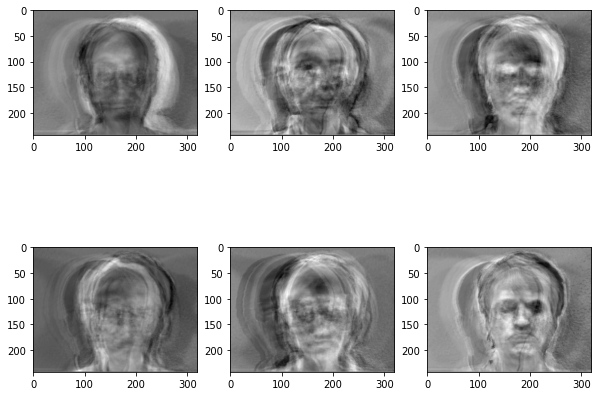

In [0]:
fig,axs = plt.subplots(2,3,figsize = (10,8))
count = 0
for i in range(2):
  for j in range(3):
    k = index_evalues[count][0]
    count+=1
    axs[i,j].imshow(eigenfaces[k].reshape(243,320),cmap='gray')
        

plt.show()

**Taking Top K eigenfaces**

In [0]:
k = 50
top_k = index_evalues[:k]
face_space = []
for i,_ in top_k:
  v = eigenfaces[i]
  v = v/np.linalg.norm(v)
  face_space.append(v)

face_space = np.array(face_space)
print (face_space.shape) 


(50, 77760)


**Computing omega k**

In [0]:
#labels = ['centerlight','glasses','happy','leftlight','noglasses','rightlight','sad','sleepy','surprised','wink']
labels = ['noglasses','happy']
omega_k = []
for i in range(1,16):
  if i<10:
    people = 'subject0'+str(i)
  else:
    people = 'subject' + str(i)

  if people=='subject01':
    p1 = people + '.gif'
  else:
    p1 = people + '.' + labels[0]
  
  i1 = imread(os.path.join(img_path,p1))/255.0
  omega_i = np.zeros(i1.shape)
  omega_i = omega_i + i1
  for j in range(1,len(labels)):
    p2 = people + '.' + labels[j]
    i2 = imread(os.path.join(img_path,p2))/255.0
    omega_i = omega_i + i2

  omega_i = omega_i/len(labels)
  omega_i = omega_i.flatten()
  omega_k.append(omega_i)

omega_k = np.array(omega_k)
omega_k = omega_k - (avg_img.flatten())
print (omega_k.shape)

(15, 77760)


In [0]:
from collections import defaultdict
validation_images = []
validation_labels = ['wink','sad','sleepy']
for i in range(1,16):
  if i<10:
    people = 'subject0'+str(i)
  else:
    people = 'subject' + str(i)
  for l in validation_labels:
    if l=='centerlight' and people=='subject01':
      validation_images.append(str(people+'.gif'))
    else:
      validation_images.append(str(people + '.' + l))

print ('Computing thresholds from %d images' %len(validation_images))


face_threshold = 0
epsilons = []
no_of_classes = len(test_images)
count = 0

epsilonk_thresholds = defaultdict(list)

for index,img in enumerate(validation_images):
  #if img not in test_images:
  label = int(img.split('.')[0][-2:])
  label = label-1
  
  i = imread(os.path.join(img_path,img))/255.0
  phi = i - avg_img
  phi = phi.flatten()
  omega = face_space @ phi.T
  phi_f = np.zeros(face_space[0].shape)

  for j in range(face_space.shape[0]):
    phi_f = phi_f + omega[j]*face_space[j]

  
  for j in range(no_of_classes):
    omega_j = face_space @ omega_k[j].T
    epsilon_k = np.linalg.norm(omega - omega_j)
    #if label == j and epsilon_k > epsilonk_thresholds[j]:
     # epsilonk_thresholds[j] = epsilon_k
    if label==j:
      epsilonk_thresholds[label].append(epsilon_k)


    

  epsilon = np.linalg.norm(phi - phi_f)
  epsilons.append(epsilon)
  if epsilon > face_threshold:
    face_threshold = epsilon
    


print (face_threshold)

temp = {}
t = []
for k in epsilonk_thresholds.keys():
  q1 = np.percentile(epsilonk_thresholds[k],25)
  q3 = np.percentile(epsilonk_thresholds[k],75)
  iqr = q3 - q1

  t.append(q3 + 4.5*iqr)
  #t.append(np.max(epsilonk_thresholds[k]))

epsilonk_thresholds = t

print (epsilonk_thresholds)

Computing thresholds from 45 images
1006.5686054675471
[66.28748132517944, 90.96240598715102, 25.3374033595411, 76.30788783333124, 34.891673016522795, 66.8578435259141, 68.13292154104775, 94.15699032212257, 88.68864046514979, 33.263889593529385, 140.72852232301466, 173.0438942516679, 39.709588251224915, 92.82305321667616, 111.11868795285145]


In [0]:
projections = []

In [0]:
def test(test_image,has_face = True)->int:
  if has_face==False:
    phi = test_image
  else:
    phi = test_image - avg_img 

  phi = phi.flatten()
  omega = face_space @ phi.T
  phi_f = np.zeros(face_space[0].shape)

  for j in range(face_space.shape[0]):
    phi_f = phi_f + omega[j]*face_space[j]

  
  epsilon = np.linalg.norm(phi - phi_f)
  
  print ('Distance from face space =%f' %epsilon)
  
  if (epsilon < face_threshold):
    
  

    epsilon_ks = []
    for j in range(len(test_images)):
      omega_j = face_space @ omega_k[j].T
      epsilon_k = np.linalg.norm(omega - omega_j)
      epsilon_ks.append(epsilon_k)
      
    c = []
    min_ek = face_threshold
    min_ek_c = -1
    for k,ek in enumerate(epsilon_ks):
      if ek < epsilonk_thresholds[k]:
        c.append(k)
        if ek < min_ek:
          min_ek = ek
          min_ek_c = k
        

    if c==[]:
      print ('Unknown image')
      print ('Projection distances to classes')
      print (epsilon_ks)
      print ('Epsilon k thresholds')
      print (epsilonk_thresholds)
      return (int(100))
    else:
      print ('Possible candidates:')
      print (c)
      print ('Projection distances to classes')
      print (epsilon_ks)
      print ('Epsilon k thresholds')
      print (epsilonk_thresholds)
      print ('Predicted class = %s' %(min_ek_c))
      return (min_ek_c)
  else:
    print ('Image does not contain a human face')
    return (int(-1))

In [0]:
count = 0
for i in range(len(test_images)):
  test_image = imread(os.path.join(img_path,test_images[i]))/255.0
  true_label = i
  print ('\n\nTrue Label = %d' %i)
  predicted_label = test(test_image)
  if true_label == predicted_label:
    count +=1

print ("No. of correct classifications: %d out of %d test set images " %(count,len(test_images)))



True Label = 0
Distance from face space =179.997055
Possible candidates:
[0, 11]
Projection distances to classes
[44.73297202986832, 155.4132812342307, 164.31554701198596, 111.22887691998922, 82.43713822037759, 365.7334747952718, 146.6792921418029, 141.46833348767126, 159.90687169316038, 127.57268437485574, 143.9051682518638, 133.8874498621472, 104.2196735197423, 283.8343370934408, 115.20521051420955]
Epsilon k thresholds
[66.28748132517944, 90.96240598715102, 25.3374033595411, 76.30788783333124, 34.891673016522795, 66.8578435259141, 68.13292154104775, 94.15699032212257, 88.68864046514979, 33.263889593529385, 140.72852232301466, 173.0438942516679, 39.709588251224915, 92.82305321667616, 111.11868795285145]
Predicted class = 0


True Label = 1
Distance from face space =458.691843
Possible candidates:
[1, 10, 11]
Projection distances to classes
[118.05481043144914, 8.561729454851074, 262.63610978346935, 78.16679486536327, 127.06349017404945, 448.46910658520807, 237.81350854167965, 249.9